In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




import pydot

Let us define methods to pre-process the tweets

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/...csv')
#df = df.sample(frac = 1)

df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
df = pd.read_csv('/content/reviewsfinalupdated.csv')
df = df.sample(frac = 1)

msk = np.random.rand(len(df)) <= 0.8

train_data = df[msk]
test_data = df[~msk]


train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['content'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['score'].value_counts())
print(len(train_data))
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max()
print(max_train_sentence_length)


FileNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/....csv')
df = df.sample(frac = 1)
#df["label"].replace({1:1, 2:1, 3:2, 4:3, 5:3}, inplace=True)
msk = np.random.rand(len(df)) <= 0.8

train_data = df[msk]
test_data = df[~msk]


train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['label'].value_counts())
print(len(train_data))
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max()


train_data['text'] = train_data['text'].apply(remove_emoji)
train_data['text'] = train_data['text'].apply(remove_url)
train_data['text'] = train_data['text'].apply(clean_text)



test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split())) 

max_test_sentence_length  = test_data['Num_words_text'].max()

mask = test_data['Num_words_text'] >2
test_data = test_data[mask]

print('-------Test data--------')
print(test_data['text'].value_counts())
print(len(test_data))
print('-------------------------')

test_data['text'] = test_data['text'].apply(remove_emoji)
test_data['text'] = test_data['text'].apply(remove_url)
test_data['text'] = test_data['text'].apply(clean_text)


print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


-------Train data--------
1    28428
0    27945
Name: label, dtype: int64
56373
-------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-------Test data--------
Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
test_data

,Unnamed: 0,title,text,label,Num_words_text,pred_sentiment
62950,62950,La Cruzada Albigense amenaza el cetro Cristian...,cruzada albigense amenaza cetro cristiano rona...,1,698,1.0
5429,5429,"As battle rages, devastated Philippine city st...",marawi city philippines reuters war might stil...,0,434,0.0
25265,25265,Is the Hillary email scandal Watergate all ove...,the reporter who broke the watergate scandal w...,0,1008,1.0
46840,46840,LOL! Democrat Congressman Says Best Way To Fig...,msnbc host asks congressman ted leiu democrat ...,1,124,1.0
12823,12823,RARE INTERVIEW WITH WHITE HOUSE SECRETARY: Bil...,this mindblowing interview that confirms much ...,1,1858,1.0
...,...,...,...,...,...,...
70400,70400,Explosive Assange/Pilger Interview on US Elect...,other writers “whistleblower julian assange ha...,1,3114,1.0
20921,20921,WATCH: Trump Supporter Admits What ‘Make Amer...,the reason why many conservatives support dona...,1,402,0.0
44854,44854,"WOW! CHICAGO REPORTEDLY FINDS At Least 14,000 ...",the head the chicago republican party claiming...,1,242,1.0
67693,67693,Tiger shot dead in Paris after escaping from c...,paris reuters tiger was shot dead western pari...,0,47,0.0


Let us split the training data into train and validation datasets
Let us convert our training,validation and test data into the format accepted by tensorflow

***
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
<br>
This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...
***

In [ ]:
num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['text'].tolist())


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

   


[[1, 66, 14, 20]]


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))


Train data len:50850
Class distributionCounter({1: 25655, 0: 25195})
Valid data len:5650
Class distributionCounter({1: 2851, 0: 2799})


In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )

test_data['text'] = str(test_data['text']).lower()
x_test  = np.array( tokenizer.texts_to_sequences(test_data['text'].tolist()) )



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))


x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
#test_data['text'] = str(test_data['text']).lower()
x_test  = np.array( tokenizer.texts_to_sequences(test_data['text'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=1000)
x_valid = pad_sequences(x_valid, padding='post', maxlen=1000)
x_test = pad_sequences(x_test, padding='post', maxlen=1000)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print(train_labels)
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))


Train data len:50761
Class distributionCounter({1: 25704, 0: 25057})
Valid data len:5641
Class distributionCounter({1: 2856, 0: 2785})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


[  248   281   111  4485     5  2966  5421  2034   894  1883  3143   243
     1     2   460    84    44  2401  6146  6376    18   944  4165     2
   783     2    11   160   981     6  3213     2    71  1680  4147    33
   375  1496   135    89  1666     3   212  1885  5620   977   227   382
   721     6  8416 11273    15     9  2891  1481     1   362   301  5232
  3420  6693   593    38  2006     2   454     2  3723 15937     2    80
     1     7     1     2  4701   320 16649    64  2731   250   635     7
  3097    71    11   623  3035   735     9  7985  7962   134     5   171
   239  2725   749  2028  1169  1036  1785   131  3861     3     2  2002
  8101  4815   832   219    32   282  5421  1305     2   213     4    17
    24  1561     6     2   163  9184     2   167   832     2   998     7
    14     1   328    18    28    14   699     2 16708    60   117   791
    21   998   310  1851   518     1   956  1579     3  5848  5421  9245
     1  2268   258     3    97   408     3    97   

In [ ]:
test_data

,Unnamed: 0,title,text,label,Num_words_text
62950,62950,La Cruzada Albigense amenaza el cetro Cristian...,cruzada albigense amenaza cetro cristiano rona...,1,698
5429,5429,"As battle rages, devastated Philippine city st...",marawi city philippines reuters war might stil...,0,434
25265,25265,Is the Hillary email scandal Watergate all ove...,the reporter who broke the watergate scandal w...,0,1008
46840,46840,LOL! Democrat Congressman Says Best Way To Fig...,msnbc host asks congressman ted leiu democrat ...,1,124
12823,12823,RARE INTERVIEW WITH WHITE HOUSE SECRETARY: Bil...,this mindblowing interview that confirms much ...,1,1858
...,...,...,...,...,...
70400,70400,Explosive Assange/Pilger Interview on US Elect...,other writers “whistleblower julian assange ha...,1,3114
20921,20921,WATCH: Trump Supporter Admits What ‘Make Amer...,the reason why many conservatives support dona...,1,402
44854,44854,"WOW! CHICAGO REPORTEDLY FINDS At Least 14,000 ...",the head the chicago republican party claiming...,1,242
67693,67693,Tiger shot dead in Paris after escaping from c...,paris reuters tiger was shot dead western pari...,0,47


In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

[1, 1, 1, 0, 0, 0, 1, 1, 0, 1]
Text to number
[1 1 1 0 0 0 1 1 0 1]
Number to category
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


Let us create a simple Convolutional Neural Network model  
<br>
<br>
Keras is a high-level API that's easier for ML beginners, as well as researchers.
It is integrated as part of Tensorflow 2.0
<br>
I am using the Sequential model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
Source :https://www.tensorflow.org/guide/keras/sequential_model
***

In [ ]:
max_features =20000
embedding_dim =64
sequence_length = 1000

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(8,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 64)          1280064   
                                                                 
 conv1d_3 (Conv1D)           (None, 998, 8)            1544      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,281,626
Trainable params: 1,281,626
Non-trainable params: 0
____________________________________________

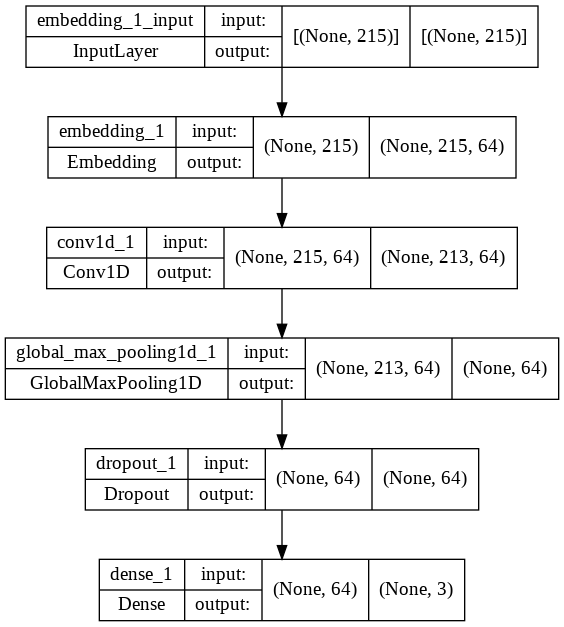

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

Let's train our model

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(64), epochs= epochs, validation_data=valid_ds.batch(64), verbose=1)

Epoch 1/10
794/794 [==============================] - 6s 8ms/step - loss: 0.3442 - categorical_accuracy: 0.8953 - val_loss: 0.2786 - val_categorical_accuracy: 0.9216
Epoch 2/10
794/794 [==============================] - 6s 8ms/step - loss: 0.3384 - categorical_accuracy: 0.8965 - val_loss: 0.2742 - val_categorical_accuracy: 0.9255
Epoch 3/10
794/794 [==============================] - 6s 7ms/step - loss: 0.3394 - categorical_accuracy: 0.8977 - val_loss: 0.2749 - val_categorical_accuracy: 0.9270
Epoch 4/10
794/794 [==============================] - 6s 8ms/step - loss: 0.3378 - categorical_accuracy: 0.8983 - val_loss: 0.2766 - val_categorical_accuracy: 0.9236
Epoch 5/10
794/794 [==============================] - 6s 7ms/step - loss: 0.3384 - categorical_accuracy: 0.8981 - val_loss: 0.2757 - val_categorical_accuracy: 0.9273
Epoch 6/10
794/794 [==============================] - 6s 7ms/step - loss: 0.3391 - categorical_accuracy: 0.8991 - val_loss: 0.2743 - val_categorical_accuracy: 0.9268
Epoc

In [ ]:
history.history


{'categorical_accuracy': [0.8952542543411255,
  0.8965347409248352,
  0.897716760635376,
  0.8982880711555481,
  0.8981107473373413,
  0.8990563750267029,
  0.8994700908660889,
  0.9010263681411743,
  0.9004944562911987,
  0.9000019431114197],
 'loss': [0.3441896438598633,
  0.3384419083595276,
  0.3394183814525604,
  0.33780497312545776,
  0.33843496441841125,
  0.33907219767570496,
  0.3370300829410553,
  0.3340148627758026,
  0.3351212441921234,
  0.3361109793186188],
 'val_categorical_accuracy': [0.9216451048851013,
  0.9255450963973999,
  0.9269633293151855,
  0.923595130443573,
  0.9273178577423096,
  0.9267860054969788,
  0.9244814515113831,
  0.9250133037567139,
  0.9228860139846802,
  0.9280269742012024],
 'val_loss': [0.2785949110984802,
  0.2742196023464203,
  0.27492424845695496,
  0.27661535143852234,
  0.275704562664032,
  0.27428606152534485,
  0.2746559679508209,
  0.27688631415367126,
  0.2766024172306061,
  0.2745830714702606]}

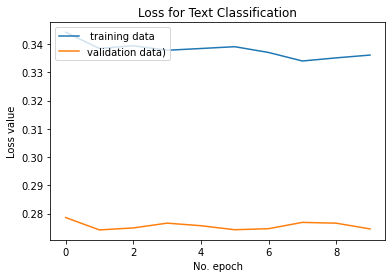

In [ ]:

plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

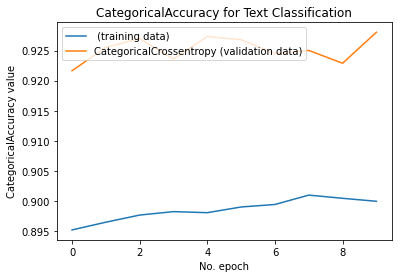

In [ ]:


plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


Lets save our model and tokenizer

Lets load our model and test on test data

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data['text'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
#train_data['text']
x_test

array([[    1,     1,     1, ...,     0,     0,     0],
       [ 8052,   176,  2696, ...,     0,     0,     0],
       [    2,  1158,    17, ...,     0,     0,     0],
       ...,
       [    2,   433,     2, ...,     0,     0,     0],
       [ 1087,   110, 11248, ...,     0,     0,     0],
       [  120,   110, 14556, ...,     0,     0,     0]], dtype=int32)

In [ ]:

# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)


Generate predictions for all samples
[[0.33029008 0.6354584 ]
 [0.71636975 0.24731188]
 [0.28308743 0.6786626 ]
 ...
 [0.16388302 0.78909206]
 [0.46675372 0.44917226]
 [0.91575533 0.09401751]]


In [ ]:
print(x_test)

[[    1     1     1 ...     0     0     0]
 [ 8052   176  2696 ...     0     0     0]
 [    2  1158    17 ...     0     0     0]
 ...
 [    2   433     2 ...     0     0     0]
 [ 1087   110 11248 ...     0     0     0]
 [  120   110 14556 ...     0     0     0]]


In [ ]:
test_data['pred_sentiment']= predict_results

test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == 0),0.0,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == 1),1.0,test_data.pred_sentiment)
#test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '2'),'positive',test_data.pred_sentiment)

In [ ]:
test_data['pred_sentiment']

62950    1.0
5429     0.0
25265    1.0
46840    1.0
12823    1.0
        ... 
70400    1.0
20921    0.0
44854    1.0
67693    0.0
71639    0.0
Name: pred_sentiment, Length: 14287, dtype: float64

In [ ]:
labels = [0, 1]
    
print(classification_report(test_data['label'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      7080
           1       0.69      0.62      0.66      7207

    accuracy                           0.67     14287
   macro avg       0.67      0.67      0.67     14287
weighted avg       0.67      0.67      0.67     14287

